In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [3]:
sales_data = pd.read_csv('sales data-set.csv')
sales_data['Date'] = pd.to_datetime(sales_data['Date'], format='%d/%m/%Y')
sales_data['Weekly_Sales'] = sales_data['Weekly_Sales'].apply(lambda x: max(x, 0))

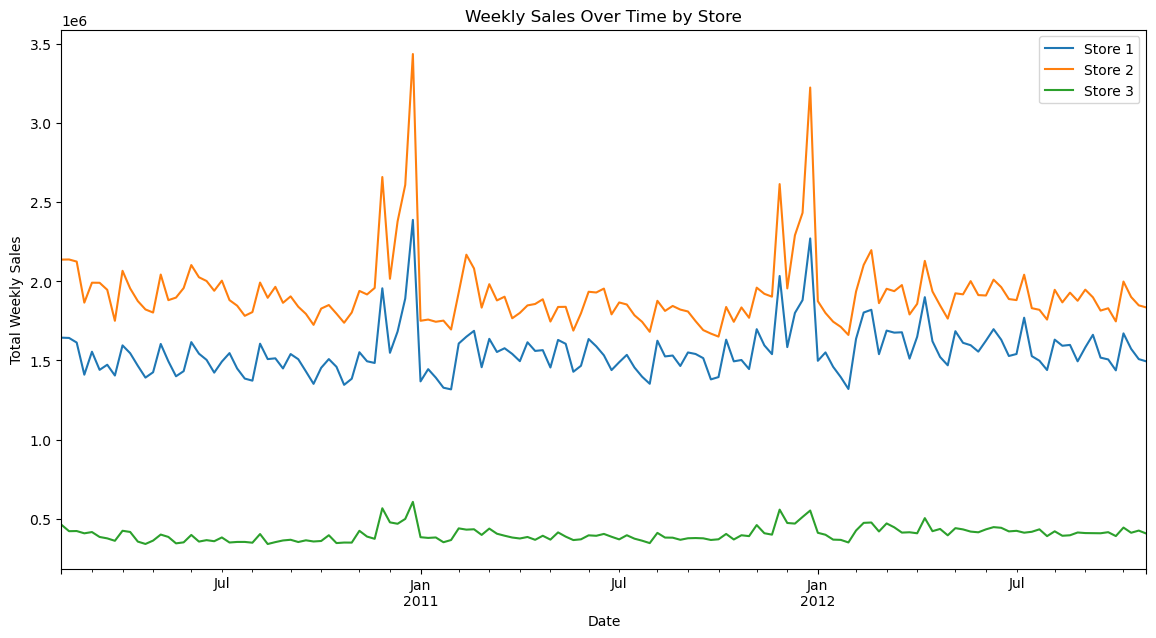

In [5]:
fig, ax = plt.subplots(figsize=(14, 7))
for label, df in sales_data[sales_data['Store'].isin([1, 2, 3])].groupby('Store'):
    df.resample('W', on='Date').sum()['Weekly_Sales'].plot(ax=ax, label=f'Store {label}')
ax.set_title('Weekly Sales Over Time by Store')
ax.set_xlabel('Date')
ax.set_ylabel('Total Weekly Sales')
ax.legend()

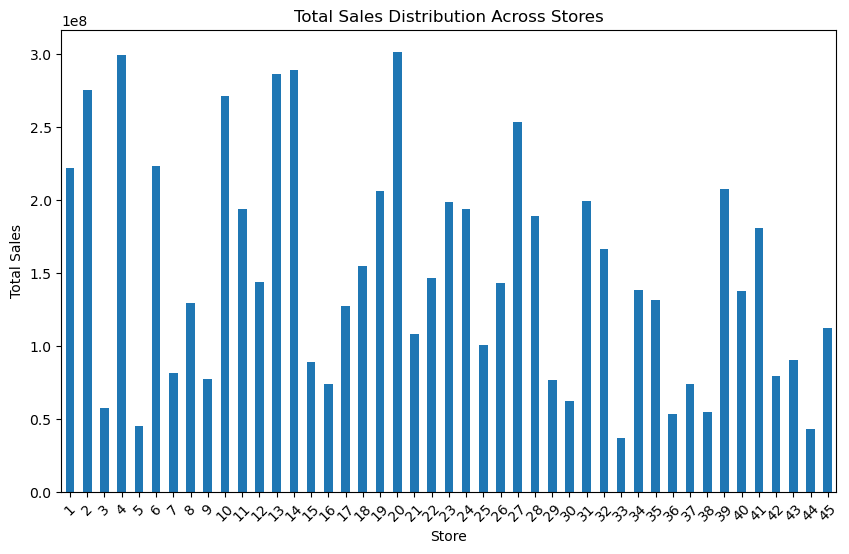

In [7]:
plt.figure(figsize=(10, 6))
sales_data.groupby('Store')['Weekly_Sales'].sum().plot(kind='bar')
plt.title('Total Sales Distribution Across Stores')
plt.xlabel('Store')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.show()

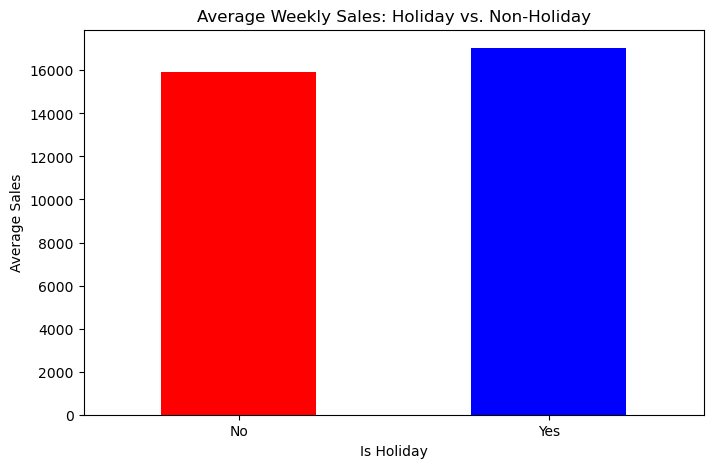

In [9]:
plt.figure(figsize=(8, 5))
sales_data.groupby('IsHoliday')['Weekly_Sales'].mean().plot(kind='bar', color=['red', 'blue'])
plt.title('Average Weekly Sales: Holiday vs. Non-Holiday')
plt.xlabel('Is Holiday')
plt.ylabel('Average Sales')
plt.xticks(ticks=[0, 1], labels=['No', 'Yes'], rotation=0)
plt.show()

In [11]:
sales_data['Year'] = sales_data['Date'].dt.year
sales_data['Month'] = sales_data['Date'].dt.month
sales_data['Week'] = sales_data['Date'].dt.isocalendar().week
sales_data['IsHoliday'] = sales_data['IsHoliday'].astype(int) 

In [13]:
X = sales_data.drop(['Weekly_Sales', 'Date'], axis=1)
y = sales_data['Weekly_Sales']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf_model = RandomForestRegressor(n_estimators=50, min_samples_leaf=10, random_state=42, n_jobs=-1)

rf_model.fit(X_train, y_train)
y_train_pred = rf_model.predict(X_train)
y_test_pred = rf_model.predict(X_test)

train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)

print(f'Training MSE: {train_mse:.2f}, Test MSE: {test_mse:.2f}')
print(f'Training R^2: {train_r2:.2f}, Test R^2: {test_r2:.2f}')

Training MSE: 20171200.72, Test MSE: 23565649.06
Training R^2: 0.96, Test R^2: 0.95


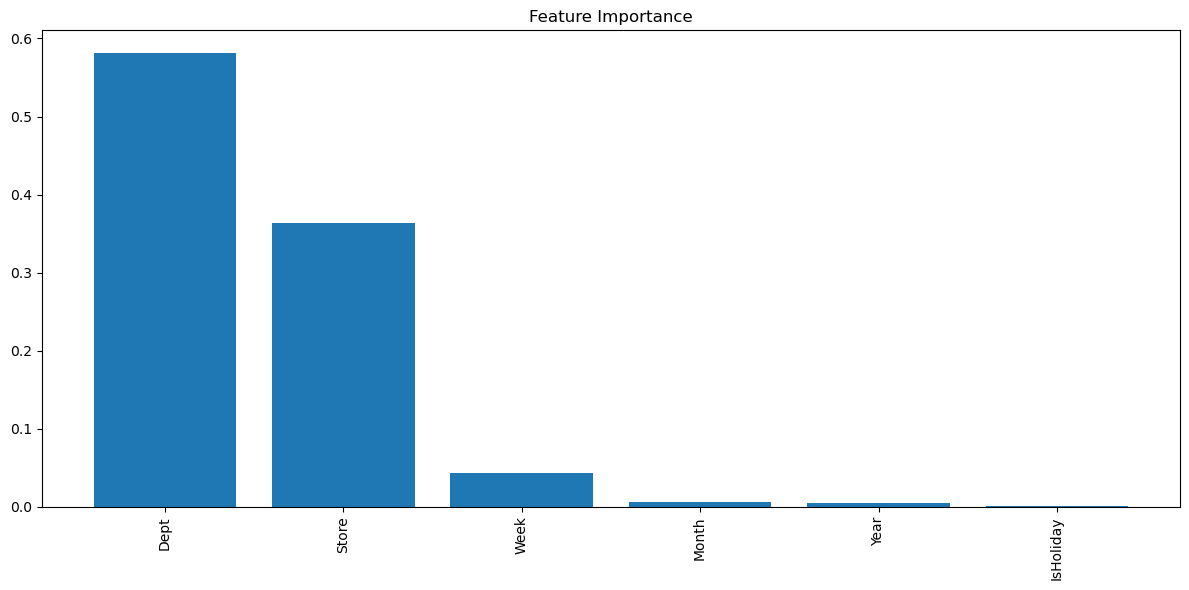

In [15]:
feature_importances = rf_model.feature_importances_
sorted_indices = np.argsort(feature_importances)[::-1]

plt.figure(figsize=(12, 6))
plt.title('Feature Importance')
plt.bar(range(X.shape[1]), feature_importances[sorted_indices], align='center')
plt.xticks(range(X.shape[1]), X.columns[sorted_indices], rotation=90)
plt.tight_layout()
plt.show()

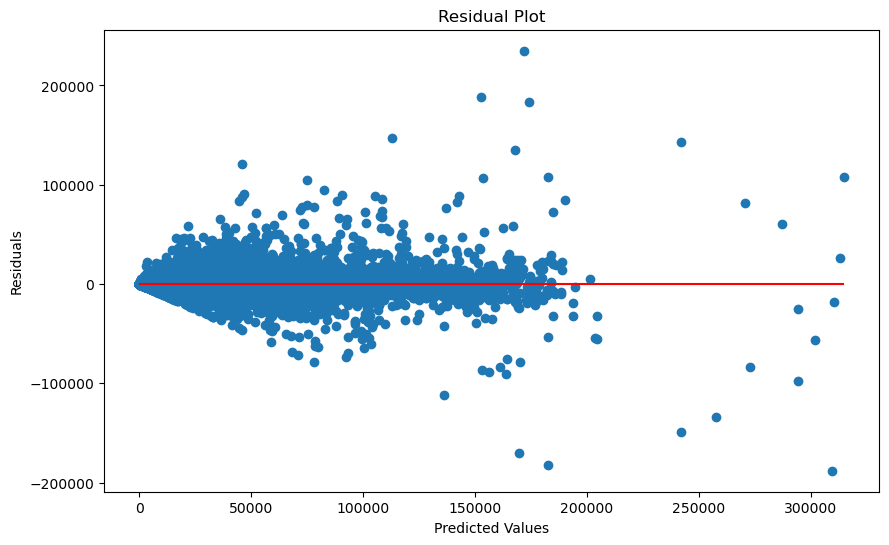

In [17]:
residuals = y_test - y_test_pred

plt.figure(figsize=(10, 6))
plt.scatter(y_test_pred, residuals)
plt.hlines(y=0, xmin=min(y_test_pred), xmax=max(y_test_pred), colors='red')
plt.title('Residual Plot')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.show()

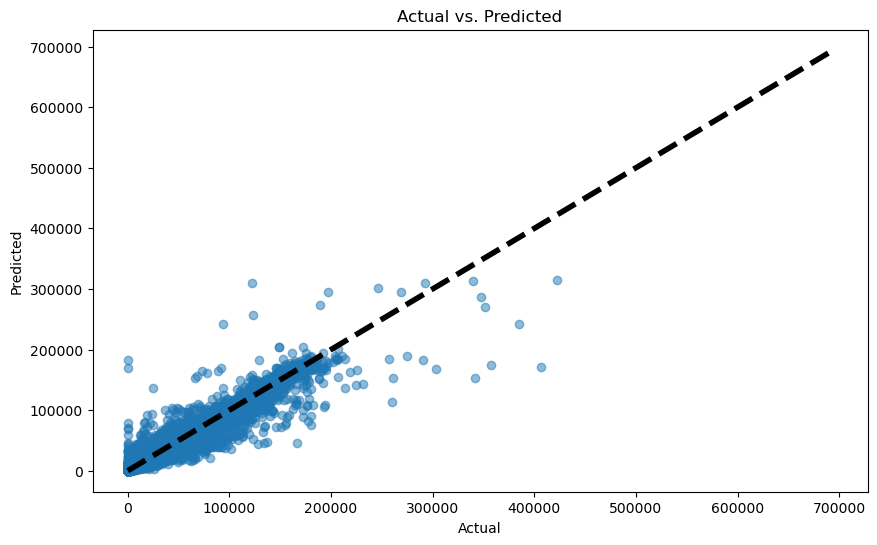

In [19]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_test_pred, alpha=0.5)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs. Predicted')
plt.show()

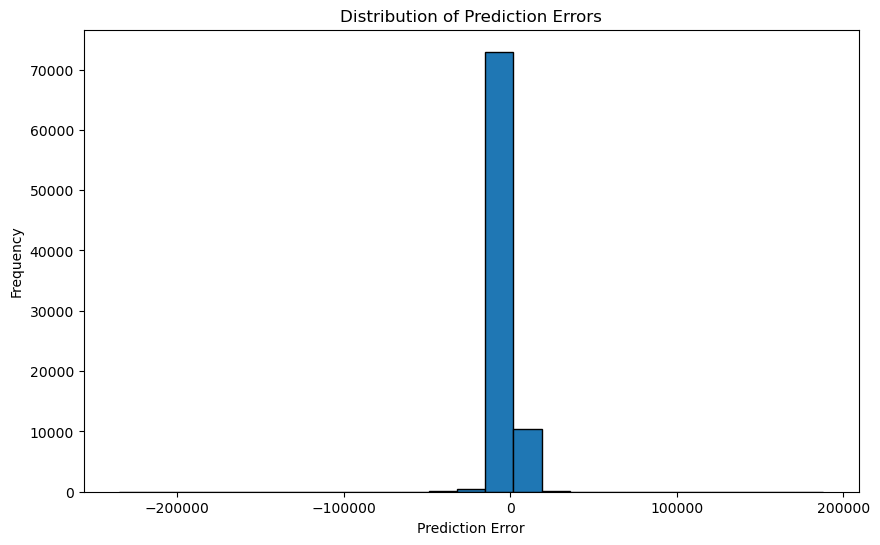

In [21]:
errors = y_test_pred - y_test

plt.figure(figsize=(10, 6))
plt.hist(errors, bins=25, edgecolor='black')
plt.title('Distribution of Prediction Errors')
plt.xlabel('Prediction Error')
plt.ylabel('Frequency')
plt.show()